<a href="https://colab.research.google.com/github/GbemisolaAyejuni/CIND820-Big-Data-Analytics-Project/blob/main/Data_Description%2C_Cleaning%2C_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''!pip install numpy
!pip install plotly
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install statsmodels
!pip install yellowbrick
!pip install imblearn
!pip install xgboost
!pip install graphviz'''

'!pip install numpy\n!pip install plotly\n!pip install pandas\n!pip install matplotlib\n!pip install seaborn\n!pip install sklearn\n!pip install statsmodels\n!pip install yellowbrick\n!pip install imblearn\n!pip install xgboost\n!pip install graphviz'

In [ ]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read and Load Dataset
reviews = pd.read_csv('/content/filtered_reviews.zip', sep=',', header=0)
business = pd.read_csv('/content/filtered_businesses.zip', sep=',', header=0)

In [ ]:
reviews.head()

,review_id,user_id,business_id,stars,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31


In [ ]:
business.head()

,business_id,name,city,state,stars,review_count,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,TN,2.0,6,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,Affton,MO,3.0,19,"Pubs, Restaurants, Italian, Bars, American (Tr..."
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,TN,1.5,10,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,..."
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,FL,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks"


In [ ]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52286 entries, 0 to 52285
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52286 non-null  object 
 1   name          52286 non-null  object 
 2   city          52286 non-null  object 
 3   state         52286 non-null  object 
 4   stars         52286 non-null  float64
 5   review_count  52286 non-null  int64  
 6   categories    52286 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.8+ MB


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724684 entries, 0 to 4724683
Data columns (total 6 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   text         object
 5   date         object
dtypes: int64(1), object(5)
memory usage: 216.3+ MB


In [ ]:
business.columns

Index(['business_id', 'name', 'city', 'state', 'stars', 'review_count',
       'categories'],
      dtype='object')

In [ ]:
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'text', 'date'], dtype='object')

In [ ]:
business['categories'].value_counts()

,count
categories,
"Restaurants, Pizza",935
"Pizza, Restaurants",823
"Restaurants, Mexican",728
"Restaurants, Chinese",708
"Mexican, Restaurants",672
...,...
"Sports Bars, Bars, American (Traditional), Sandwiches, Nightlife, Restaurants",1
"Restaurants, Asian Fusion, Thai, Taiwanese, Noodles",1
"Food, Sandwiches, Fast Food, Restaurants, Diners, Seafood, Street Vendors",1


In [ ]:
business['city'].value_counts()

,count
city,
Philadelphia,5854
Tampa,2961
Indianapolis,2862
Nashville,2503
Tucson,2470
...,...
Woolwich Twp.,1
Quinton,1
Philadephia,1


In [ ]:
business['stars'].value_counts()

,count
stars,
4.0,13444
3.5,11798
4.5,8360
3.0,7641
2.5,4850
2.0,2911
5.0,1554
1.5,1481
1.0,247


In [ ]:
reviews['stars'].value_counts()

,count
stars,
5,2079531
4,1130305
1,567227
3,543126
2,404495


In [ ]:
print('Number of missing values: ', business.isnull().values.sum())

Number of missing values:  0


In [ ]:
print('Number of missing values: ', reviews.isnull().values.sum())

Number of missing values:  0


In [ ]:
business.isnull().sum()

,0
business_id,0
name,0
city,0
state,0
stars,0
review_count,0
categories,0


In [ ]:
reviews.isnull().sum()

,0
review_id,0
user_id,0
business_id,0
stars,0
text,0
date,0


In [ ]:
duplicate_business = business[business.duplicated()]
print("Duplicate Rows based on all columns are:", duplicate_business.shape)

Duplicate Rows based on all columns are: (0, 7)


In [ ]:
duplicate_reviews = reviews[reviews.duplicated()]
print("Duplicate Rows based on all columns are:", duplicate_reviews.shape)

Duplicate Rows based on all columns are: (0, 6)


In [ ]:
business.dtypes

,0
business_id,object
name,object
city,object
state,object
stars,float64
review_count,int64
categories,object


In [ ]:
business.describe()

,stars,review_count
count,52286.000000,52286.000000
mean,3.515234,87.241078
std,0.829585,188.912445
min,1.000000,5.000000
25%,3.000000,13.000000
50%,3.500000,33.000000
75%,4.000000,89.000000
max,5.000000,7568.000000


In [ ]:
reviews.dtypes

,0
review_id,object
user_id,object
business_id,object
stars,int64
text,object
date,object


In [ ]:
reviews.describe()

,stars
count,4.724684e+06
mean,3.793792e+00
std,1.391234e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [ ]:
business.shape

(52286, 7)

In [ ]:
reviews.shape

(4724684, 6)

In [ ]:
#Language detection. Delete all reviews in non-english language
#install the library
!pip install langdetect

#import detect function from langdetect
from langdetect import detect, LangDetectException

non_en = []  # Store non-English or undetectable reviews
en_reviews = []  # Store English reviews

for index, row in reviews.iterrows():
    try:
        lang = detect(row['text'])
        if lang != 'en':
            non_en.append(row)
        else:
            en_reviews.append(row)
    except LangDetectException:
        non_en.append(row)  # Collect undetectable reviews

# Create DataFrames
non_en_df = pd.DataFrame(non_en)
en_reviews_df = pd.DataFrame(en_reviews)

# - en_reviews_df: Contains reviews detected as English
# - non_en_df: Contains reviews in other languages or those that couldn't be detected

en_reviews_df.to_csv('en_reviews.csv', index=False)
non_en_df.to_csv('non_en_reviews.csv', index=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=8c63c82ef7a1a30be1dfe558f5dfdcbe261e725136ee63d2d39e55473bfebe93
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
en_reviews_df.shape

(4719632, 6)

In [ ]:
non_en_df.shape

(5052, 6)

This chunk of code performs some more  data cleaning including: converting text to lower case, removing all punctuations, removing all numbers, removing white spaces and extra white spaces, and removing new lines.

In [ ]:
en_reviews_df = pd.read_csv('/content/en_reviews.csv', sep=',', header=0)

In [ ]:
en_reviews_df['text'] = en_reviews_df['text'].str.lower()
#change all review text to lower case

en_reviews_df['text'] = en_reviews_df['text'].str.replace('\d+', '')
#remove all numbers

en_reviews_df['text'] = en_reviews_df['text'].str.replace('\n', '').str.replace('\r', '')
#remove all new lines

In [ ]:
en_reviews_df.drop(['user_id'], axis=1, inplace=True)


In [ ]:
en_reviews_df['text'] = en_reviews_df['text'].str.replace(r'[^\w\s]', '', regex=True)
#remove all punctuations

In [ ]:
en_reviews_df.head(5)

,review_id,business_id,stars,text,date
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,if you decide to eat here just be aware it is ...,2018-07-07 22:09:11
1,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,3.0,family diner had the buffet eclectic assortmen...,2014-02-05 20:30:30
2,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5.0,wow yummy different delicious our favorite...,2015-01-04 00:01:03
3,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,4.0,cute interior and owner gave us tour of upcom...,2017-01-14 20:54:15
4,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1.0,i am a long term frequent customer of this est...,2015-09-23 23:10:31


In [ ]:
en_reviews_df.to_csv('en_reviews2.csv', index=False)

This next chunk of code is for tokenization and lemmatization

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
en_reviews_df['text']= en_reviews_df['text'].str.replace('[^a-zA-Z]','') #remove unwanted characters
en_reviews_df['text'] = en_reviews_df['text'].str.replace('\s+', ' ', regex=True).str.strip() #remove extra white spaces


In [ ]:
# Convert the 'text' column to string type before applying word_tokenize
en_reviews_df['text'] = en_reviews_df['text'].astype(str)

# Now apply word_tokenize
en_reviews_df['tokenized_text'] = en_reviews_df['text'].apply(word_tokenize)

In [ ]:
en_reviews_df.to_csv('en_reviews_tokenized.csv', index=False)

In [ ]:
en_reviews_df.head()

,review_id,business_id,stars,text,date,tokenized_text
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,if you decide to eat here just be aware it is ...,2018-07-07 22:09:11,"[if, you, decide, to, eat, here, just, be, awa..."
1,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,3.0,family diner had the buffet eclectic assortmen...,2014-02-05 20:30:30,"[family, diner, had, the, buffet, eclectic, as..."
2,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5.0,wow yummy different delicious our favorite...,2015-01-04 00:01:03,"[wow, yummy, different, delicious, our, favori..."
3,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,4.0,cute interior and owner gave us tour of upcom...,2017-01-14 20:54:15,"[cute, interior, and, owner, gave, us, tour, o..."
4,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1.0,i am a long term frequent customer of this est...,2015-09-23 23:10:31,"[i, am, a, long, term, frequent, customer, of,..."


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
english_stops = stopwords.words('english')

In [ ]:
def remove_stopwords(token_list):
  return [word for word in token_list if word not in english_stops]

en_reviews_df['tokenized_text'] = en_reviews_df['tokenized_text'].apply(remove_stopwords)

# Save the updated dataframe
en_reviews_df.to_csv('en_reviews_nostopwords.csv', index=False)

In [ ]:
en_reviews_df.head()

,review_id,business_id,stars,text,date,tokenized_text
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,if you decide to eat here just be aware it is ...,2018-07-07 22:09:11,"[decide, eat, aware, going, take, 2, hours, be..."
1,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,3.0,family diner had the buffet eclectic assortmen...,2014-02-05 20:30:30,"[family, diner, buffet, eclectic, assortment, ..."
2,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5.0,wow yummy different delicious our favorite...,2015-01-04 00:01:03,"[wow, yummy, different, delicious, favorite, l..."
3,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,4.0,cute interior and owner gave us tour of upcom...,2017-01-14 20:54:15,"[cute, interior, owner, gave, us, tour, upcomi..."
4,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1.0,i am a long term frequent customer of this est...,2015-09-23 23:10:31,"[long, term, frequent, customer, establishment..."


In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(token_list):
  return [lemmatizer.lemmatize(word) for word in token_list]

en_reviews_df['lemmatized_text'] = en_reviews_df['tokenized_text'].apply(lemmatize_tokens)

# Save the updated DataFrame
en_reviews_df.to_csv('en_reviews_lemmatized.csv', index=False)

en_reviews_df.head()

,review_id,business_id,stars,text,date,tokenized_text,lemmatized_text
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,if you decide to eat here just be aware it is ...,2018-07-07 22:09:11,"[decide, eat, aware, going, take, 2, hours, be...","[decide, eat, aware, going, take, 2, hour, beg..."
1,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,3.0,family diner had the buffet eclectic assortmen...,2014-02-05 20:30:30,"[family, diner, buffet, eclectic, assortment, ...","[family, diner, buffet, eclectic, assortment, ..."
2,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5.0,wow yummy different delicious our favorite...,2015-01-04 00:01:03,"[wow, yummy, different, delicious, favorite, l...","[wow, yummy, different, delicious, favorite, l..."
3,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,4.0,cute interior and owner gave us tour of upcom...,2017-01-14 20:54:15,"[cute, interior, owner, gave, us, tour, upcomi...","[cute, interior, owner, gave, u, tour, upcomin..."
4,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1.0,i am a long term frequent customer of this est...,2015-09-23 23:10:31,"[long, term, frequent, customer, establishment...","[long, term, frequent, customer, establishment..."


In [ ]:
en_reviews_df['cleaned_text'] = en_reviews_df['lemmatized_text'].apply(lambda x: ' '.join(x))
en_reviews_df.to_csv('en_reviews_cleaned.csv', index=False)
en_reviews_df.head()

,review_id,business_id,stars,text,date,tokenized_text,lemmatized_text,cleaned_text
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,if you decide to eat here just be aware it is ...,2018-07-07 22:09:11,"[decide, eat, aware, going, take, 2, hours, be...","[decide, eat, aware, going, take, 2, hour, beg...",decide eat aware going take 2 hour beginning e...
1,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,3.0,family diner had the buffet eclectic assortmen...,2014-02-05 20:30:30,"[family, diner, buffet, eclectic, assortment, ...","[family, diner, buffet, eclectic, assortment, ...",family diner buffet eclectic assortment large ...
2,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5.0,wow yummy different delicious our favorite...,2015-01-04 00:01:03,"[wow, yummy, different, delicious, favorite, l...","[wow, yummy, different, delicious, favorite, l...",wow yummy different delicious favorite lamb cu...
3,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,4.0,cute interior and owner gave us tour of upcom...,2017-01-14 20:54:15,"[cute, interior, owner, gave, us, tour, upcomi...","[cute, interior, owner, gave, u, tour, upcomin...",cute interior owner gave u tour upcoming patio...
4,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1.0,i am a long term frequent customer of this est...,2015-09-23 23:10:31,"[long, term, frequent, customer, establishment...","[long, term, frequent, customer, establishment...",long term frequent customer establishment went...


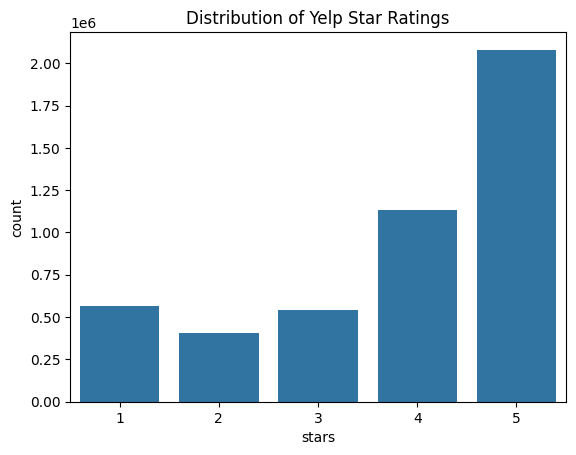

In [ ]:
sns.countplot(x='stars', data=reviews)
plt.title('Distribution of Yelp Star Ratings')
plt.show()


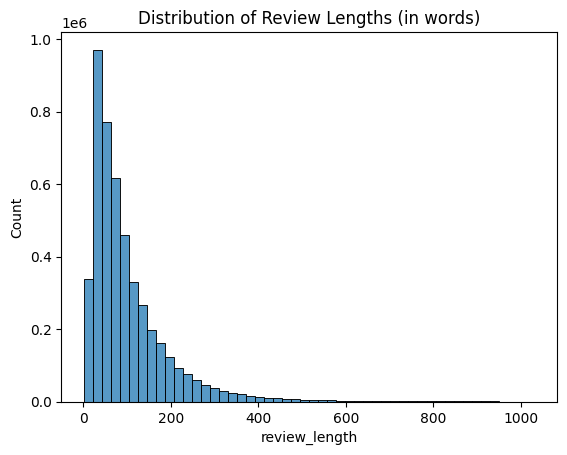

In [ ]:
yelp_data['review_length'] = yelp_data['text'].apply(lambda x: len(x.split()))

sns.histplot(yelp_data['review_length'], bins=50)
plt.title('Distribution of Review Lengths (in words)')
plt.show()


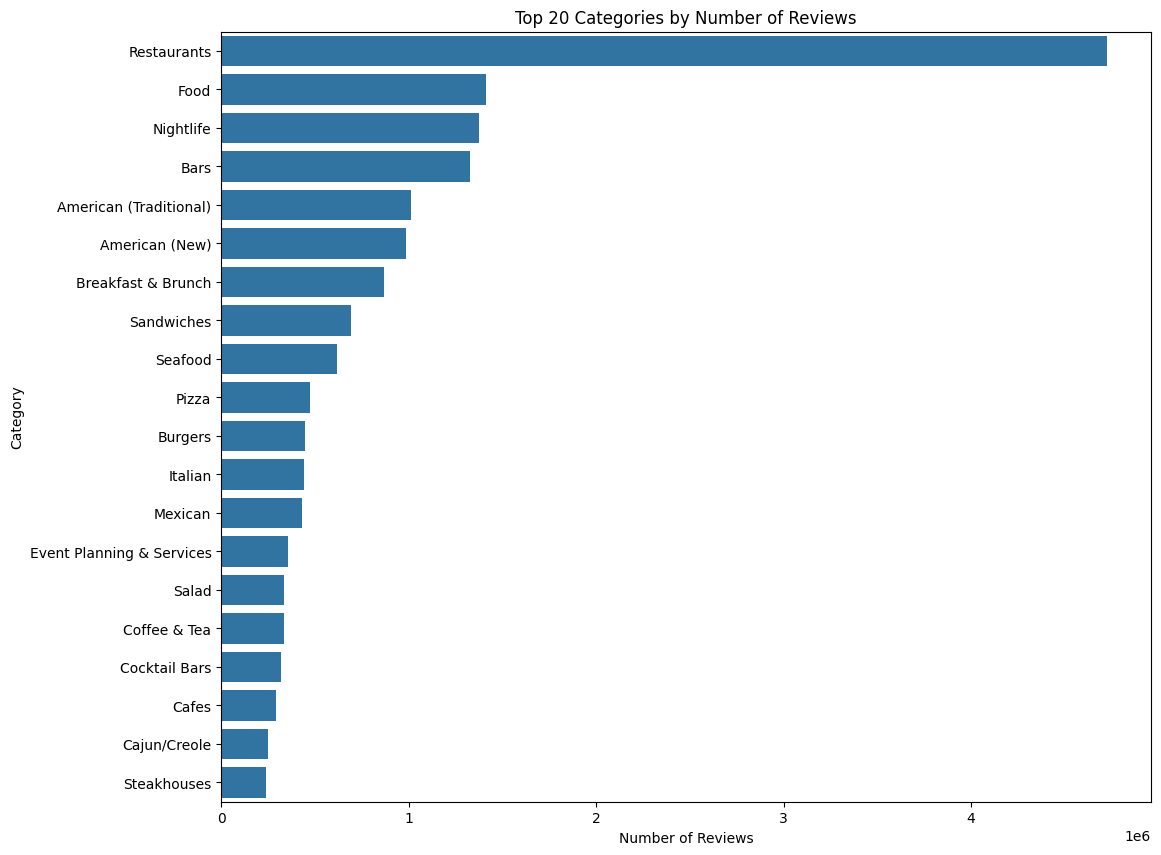

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split the 'categories' column to flatten the list of categories into individual rows

# Explode the 'categories' column into separate rows
yelp_data['categories_list'] = yelp_data['categories'].str.split(', ')
yelp_reviews_exploded = yelp_data.explode('categories_list')

# Count the number of reviews associated with each category
category_review_counts = yelp_reviews_exploded.groupby('categories_list')['review_id'].count().reset_index()
category_review_counts.columns = ['Category', 'Number of Reviews']

# Visualize the top 20 categories by number of reviews
plt.figure(figsize=(12, 10))
sns.barplot(y='Category', x='Number of Reviews', data=category_review_counts.sort_values(by='Number of Reviews', ascending=False).head(20))
plt.title('Top 20 Categories by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Category')
plt.show()
